# Chapter 10

## Conceptual Question 3

Performing K-means clustering manually, with K = 2

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math

sns.set(style="whitegrid")

In [2]:
X1 = np.asarray([1,1,0,5,6,4])
X2 = np.asarray([4,3,4,1,2,0])

### (a) Plot the observations

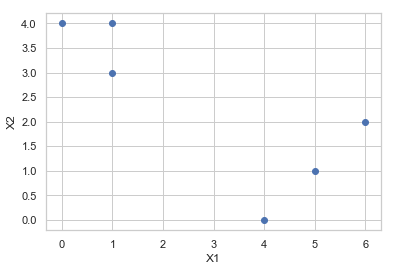

In [3]:
plt.scatter(X1,X2)
plt.xlabel("X1")
plt.ylabel("X2")

plt.show()

### (b) Randomly assign a cluster label to each observation. Report the cluster labels for each observation.

In [4]:
K = 2
cluster_labels =  np.random.randint(0,2,size=len(X1))
# There are more elegant ways to do this
while len(set(cluster_labels)) != 2:
    cluster_labels =  np.random.randint(0,2,size=len(X1))
print(cluster_labels)

[1 0 0 1 1 1]


### (c) Compute the centroid for each cluster

In [5]:
def compute_centroid_each_cluster(data, cluster_labels):
    """
    For each cluster, compute the (Euclidean) centroid. Return a {label: centroid} dictionary.
    """
    cluster_labels = np.asarray(cluster_labels)
    centroids = {}
    for label in set(cluster_labels):
        cluster_data = data[cluster_labels==label]
        centroid_x1 = np.mean([x[0] for x in cluster_data])
        centroid_x2 = np.mean([x[1] for x in cluster_data])
        centroids[label] = (centroid_x1, centroid_x2)
    return centroids
            # Compute the mean

def plot_clusters(data, cluster_labels, centroids=None):
    """
    Plot the points, coloured by cluster, with centroids if given
    """
    fig, ax = plt.subplots(figsize=(5,5))
    X1, X2 = zip(*data)
    ax.scatter(X1,X2, c=cluster_labels, cmap=plt.cm.coolwarm)
    if centroids is not None:
        centroid_X1, centroid_x2 = zip(*centroids.values())
        ax.scatter(centroid_X1, centroid_x2, c="black", marker="+")
    return ax
    

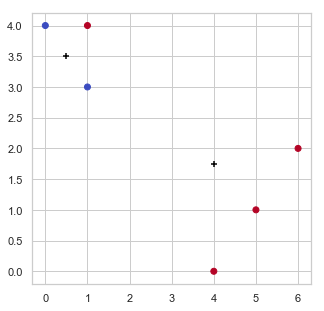

In [6]:
data = np.vstack([X1.T, X2.T]).T  # Seems messy

centroids = compute_centroid_each_cluster(data,cluster_labels)
plot_clusters(data,cluster_labels, centroids=centroids)


### (d) Assign each observation to the centroid to which it is closetst, in terms of Euclidean distance.

In [7]:
def get_new_cluster_labels(data, centroids):
    new_cluster_labels = []
    for i, row in enumerate(data):
        best_cluster_label = None
        best_distance = 1e9
        for cluster_label, centroid_position in centroids.items():
            distance = row - centroid_position
            abs_distance = math.hypot(*distance)
            if abs_distance < best_distance:
                best_cluster_label = cluster_label
                best_distance  = abs_distance
        assert best_cluster_label is not None
        new_cluster_labels.append(best_cluster_label)
    return np.asarray(new_cluster_labels)

[0 0 0 1 1 1]


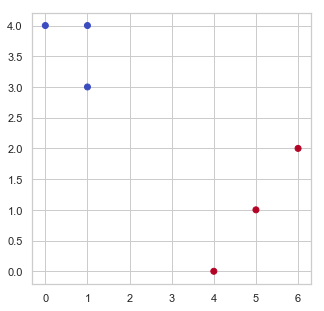

In [8]:
new_cluster_labels = get_new_cluster_labels(data, centroids)
print(new_cluster_labels)
plot_clusters(data, new_cluster_labels)

### (e) Repeat (c) and (d) until the observations stop changing

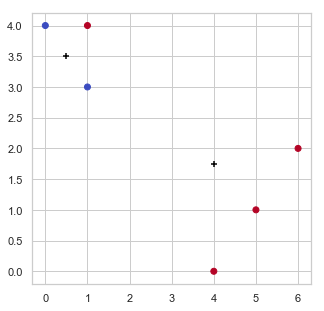

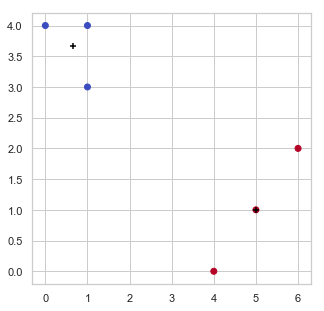

In [9]:
while True:
    centroids = compute_centroid_each_cluster(data,cluster_labels)
    plot_clusters(data,cluster_labels, centroids=centroids)
    
    new_cluster_labels = get_new_cluster_labels(data, centroids)
    if all(cluster_labels == new_cluster_labels):
        break
    cluster_labels = new_cluster_labels

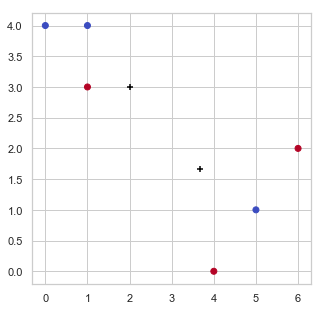

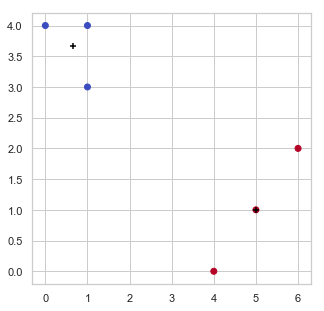

In [10]:
# Let's run the whole algo again, just to check

K = 2
cluster_labels =  np.random.randint(0,2,size=len(X1))
# There are more elegant ways to do this
while len(set(cluster_labels)) != 2:
    cluster_labels =  np.random.randint(0,2,size=len(X1))

while True:
    centroids = compute_centroid_each_cluster(data,cluster_labels)
    plot_clusters(data,cluster_labels, centroids=centroids)
    
    new_cluster_labels = get_new_cluster_labels(data, centroids)
    if all(cluster_labels == new_cluster_labels):
        break
    cluster_labels = new_cluster_labels